# FCChh impedance model
For injection energy 3.3TeV
Plot and save the impedances

### 1) Import libraries

In [7]:
%pylab notebook

import sys
import commands
from string import *
import time
import numpy as np
from copy import deepcopy
import os,re
from io_lib import *
from tables_lib import select_in_table
from particle_param import *
from Impedance import *
from DELPHI import *
from FCChh_param import *
from LHC_param import *


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Scenarios at 3.3TeV

In [11]:
# beam parameters
e,m0,c,E0=proton_param();

#Injection
E=3.3e12
V=12e6 #RF voltage

nevery=1; # downsampling of the impedance (take less points than in the full model)

# setting the scans
planes=['x'];

imp_mod_list=[]; # complete list of impedance scenarios
wake_mod_list=[];# complete list of wake scenarios

machine_str,E,gamma,sigmaz,taub,R,Qx,Qxfrac,Qy,Qyfrac,Qs,eta,f0,omega0,omegas,dphase,Estr,h=FCChh_param(E=E,V=V)

#g,a,b=longdistribution_decomp(taub,typelong="Gaussian");
#avbetax=R/Qx;avbetay=R/Qy; # average beta functions used
    #print "scenario: ",scenario

In [12]:
ResultDir='/afs/cern.ch/work/d/damorim/work/DELPHI_results/FCChh/Injection_3p3TeV/';

<IPython.core.display.Javascript object>


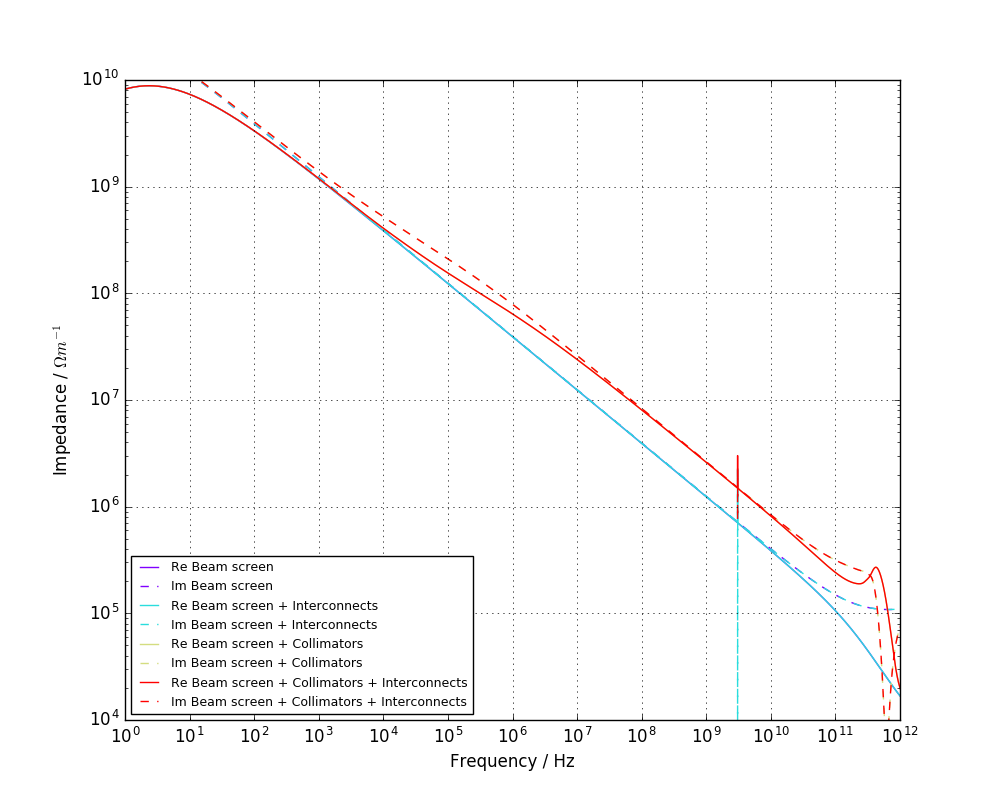

In [27]:
scenario_scan=np.array(['BS_only_'+Estr,
                    'BS_interconnects_'+Estr,
                       'BS_coll_'+Estr,
                       'BS_coll_interconnects_'+Estr])

label_scan=np.array(['Beam screen',
                     'Beam screen + Interconnects',
                    'Beam screen + Collimators',
                    'Beam screen + Collimators + Interconnects'])


imp_mod=[]; wake_mod=[];

colors_map = cm.rainbow(np.linspace(0, 1, len(scenario_scan)))

plt.close('all')
plt.figure(figsize=(1000/100,800/100),dpi=100)

for ii_scenario, scenario in enumerate(scenario_scan):
    
    root_result=ResultDir+scenario+'/'
    
    imp_mod=[]; wake_mod=[];
    suffix='_FCChh_Allthemachine_'+Estr+'_'+scenario_scan[ii_scenario]+'.dat';
    freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
    #Z_mod*=imp_fact

    imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

    #freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
    #Z_mod*=imp_fact


    #imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

    imp_mod_list.append(imp_mod);
    wake_mod_list.append(wake_mod);



    #Puting the impedance inside a list
    Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
    freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

    #Impedance plot

    plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0],label='Re '+label_scan[ii_scenario],linestyle='-',color=colors_map[ii_scenario])
    plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1],label='Im '+label_scan[ii_scenario],linestyle='--',color=colors_map[ii_scenario])


plt.xlim([1.0,1e12])
plt.ylim([1.0e4,1.0e10])

plt.xlabel(r'Frequency / Hz')
plt.ylabel(r'Impedance / $\Omega m^{-1}$')
#plt.grid()
plt.legend(loc='lower left',prop={'size':9})
plt.grid()

#plt.savefig('./Plots/FCC-hh_50TeV_impedance_cases_1.png')

plt.show()

## Scenarios at 50TeV

In [30]:
# beam parameters
e,m0,c,E0=proton_param();

#Injection
E=50e12
V=16e6 #RF voltage

nevery=1; # downsampling of the impedance (take less points than in the full model)

# setting the scans
planes=['x'];

imp_mod_list=[]; # complete list of impedance scenarios
wake_mod_list=[];# complete list of wake scenarios

machine_str,E,gamma,sigmaz,taub,R,Qx,Qxfrac,Qy,Qyfrac,Qs,eta,f0,omega0,omegas,dphase,Estr,h=FCChh_param(E=E,V=V)

#g,a,b=longdistribution_decomp(taub,typelong="Gaussian");
#avbetax=R/Qx;avbetay=R/Qy; # average beta functions used
    #print "scenario: ",scenario

In [31]:
ResultDir='/afs/cern.ch/work/d/damorim/work/DELPHI_results/FCChh/TopEnergy_50TeV/';

<IPython.core.display.Javascript object>


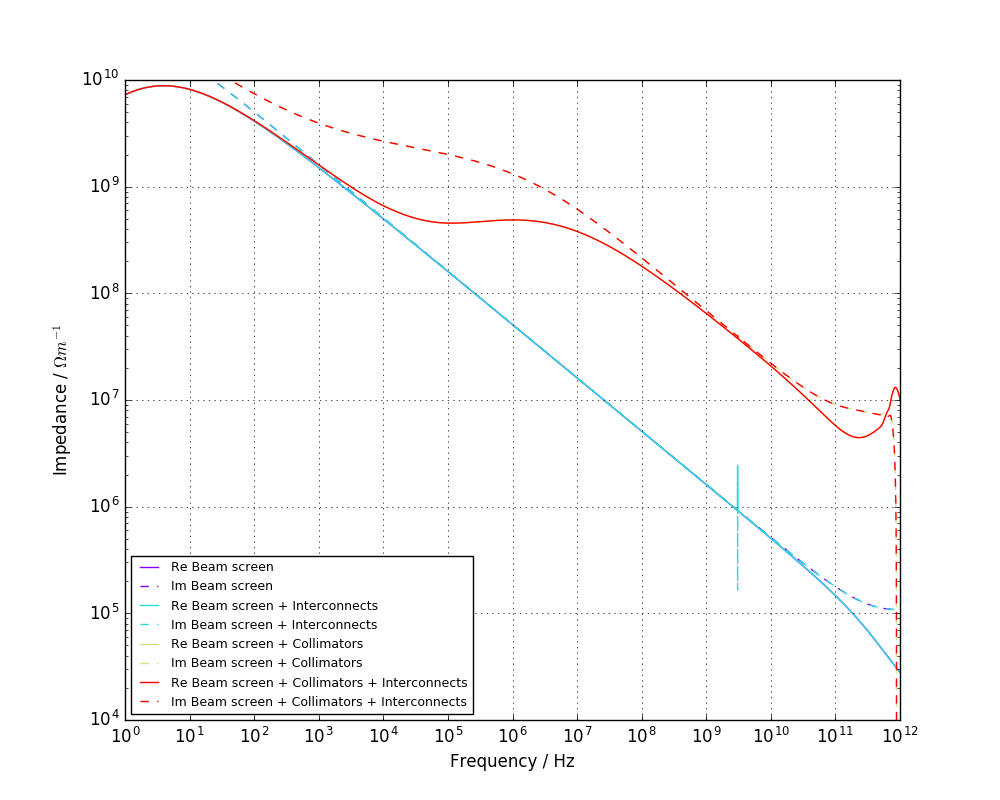

In [34]:
scenario_scan=np.array(['BS_only_'+Estr,
                    'BS_interconnects_'+Estr,
                       'BS_coll_'+Estr,
                       'BS_coll_interconnects_'+Estr])

label_scan=np.array(['Beam screen',
                     'Beam screen + Interconnects',
                    'Beam screen + Collimators',
                    'Beam screen + Collimators + Interconnects'])


imp_mod=[]; wake_mod=[];

colors_map = cm.rainbow(np.linspace(0, 1, len(scenario_scan)))

plt.close('all')
plt.figure(figsize=(1000/100,800/100),dpi=100)

for ii_scenario, scenario in enumerate(scenario_scan):
    
    root_result=ResultDir+scenario+'/'
    
    imp_mod=[]; wake_mod=[];
    suffix='_FCChh_Allthemachine_'+Estr+'_'+scenario_scan[ii_scenario]+'.dat';
    freq_mod,Z_mod=readZ(root_result+"Zxdip"+suffix);
    #Z_mod*=imp_fact

    imp_mod.append(impedance_wake(a=1,b=0,c=0,d=0,plane='x',var=freq_mod,func=Z_mod));

    #freq_mod,Z_mod=readZ(root_result+"Zydip"+suffix);
    #Z_mod*=imp_fact


    #imp_mod.append(impedance_wake(a=0,b=1,c=0,d=0,plane='y',var=freq_mod,func=Z_mod));

    imp_mod_list.append(imp_mod);
    wake_mod_list.append(wake_mod);



    #Puting the impedance inside a list
    Zlist_RW_R = deepcopy(imp_mod[0].func[::nevery,:])
    freqlist_RW_R = deepcopy(imp_mod[0].var[::nevery])

    #Impedance plot

    plt.loglog(freqlist_RW_R, Zlist_RW_R[:,0],label='Re '+label_scan[ii_scenario],linestyle='-',color=colors_map[ii_scenario])
    plt.loglog(freqlist_RW_R, Zlist_RW_R[:,1],label='Im '+label_scan[ii_scenario],linestyle='--',color=colors_map[ii_scenario])


plt.xlim([1.0,1e12])
plt.ylim([1.0e4,1.0e10])

plt.xlabel(r'Frequency / Hz')
plt.ylabel(r'Impedance / $\Omega m^{-1}$')
#plt.grid()
plt.legend(loc='lower left',prop={'size':9})
plt.grid()

#plt.savefig('./Plots/FCC-hh_50TeV_impedance_cases_1.png')

plt.show()